In [3]:
# Import the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
import requests
from config import weather_api_key
from citipy import citipy
import time
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations and save them to access later - note 6.1.4 for more info
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list 
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitutde combinations 
#for coordinate in coordinates:
#    print(coordinate[0], coordinate[1])

In [7]:
# Create a list for holding the cities
cities=[]

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

In [8]:
# Get the base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list (we will use enurmerate to get the index of the city for logging purposes, otherwise we
# will get a programming error when building the city_url b/c it adds the index not the city name to the city_url) 6.2.6
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        #time.sleep(60)

    # Create endpoint URL with each city.
    city_url = base_url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
        
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | pangnirtung
Processing Record 2 of Set 1 | ilinskiy
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | marcona
City not found. Skipping...
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | ruwi
Processing Record 7 of Set 1 | tambopata
Processing Record 8 of Set 1 | lehre
Processing Record 9 of Set 1 | taltal
Processing Record 10 of Set 1 | sao filipe
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | eirunepe
Processing Record 17 of Set 1 | awbari
Processing Record 18 of Set 1 | saint george
Processing Record 19 of Set 1 | codrington
Processing Record 20 of Set 1 | beyneu
Processing Record 21 of Set 1 | olafsvik
Processing Record 22 of Set 1 | allada
Processing Record 23 of Set 1 | kiisa


Processing Record 42 of Set 4 | kalmar
Processing Record 43 of Set 4 | ferrandina
Processing Record 44 of Set 4 | vazante
Processing Record 45 of Set 4 | dolbeau
City not found. Skipping...
Processing Record 46 of Set 4 | charlestown
Processing Record 47 of Set 4 | shurugwi
Processing Record 48 of Set 4 | ust-tsilma
Processing Record 49 of Set 4 | vila velha
Processing Record 50 of Set 4 | idritsa
Processing Record 1 of Set 5 | miandrivazo
Processing Record 2 of Set 5 | guerande
Processing Record 3 of Set 5 | biarritz
Processing Record 4 of Set 5 | inhambane
Processing Record 5 of Set 5 | qibili
City not found. Skipping...
Processing Record 6 of Set 5 | amderma
City not found. Skipping...
Processing Record 7 of Set 5 | rzhev
Processing Record 8 of Set 5 | gayny
Processing Record 9 of Set 5 | cap malheureux
Processing Record 10 of Set 5 | matay
Processing Record 11 of Set 5 | mehamn
Processing Record 12 of Set 5 | meiningen
Processing Record 13 of Set 5 | hofn
Processing Record 14 of Se

Processing Record 30 of Set 8 | bocas del toro
Processing Record 31 of Set 8 | hobyo
Processing Record 32 of Set 8 | mandera
Processing Record 33 of Set 8 | parral
Processing Record 34 of Set 8 | turtas
Processing Record 35 of Set 8 | santa cruz
Processing Record 36 of Set 8 | quelimane
Processing Record 37 of Set 8 | tres arroyos
Processing Record 38 of Set 8 | sechura
Processing Record 39 of Set 8 | los llanos de aridane
Processing Record 40 of Set 8 | sainte-maxime
Processing Record 41 of Set 8 | kilingi-nomme
Processing Record 42 of Set 8 | keetmanshoop
Processing Record 43 of Set 8 | narasannapeta
Processing Record 44 of Set 8 | lima
Processing Record 45 of Set 8 | bani
Processing Record 46 of Set 8 | descalvado
Processing Record 47 of Set 8 | abeche
Processing Record 48 of Set 8 | puebloviejo
Processing Record 49 of Set 8 | bayan
Processing Record 50 of Set 8 | tselinnoye
Processing Record 1 of Set 9 | lodja
Processing Record 2 of Set 9 | umea
Processing Record 3 of Set 9 | gari


Processing Record 16 of Set 12 | barinitas
Processing Record 17 of Set 12 | luau
Processing Record 18 of Set 12 | trairi
Processing Record 19 of Set 12 | lemesos
City not found. Skipping...
Processing Record 20 of Set 12 | camargo
Processing Record 21 of Set 12 | zemio
Processing Record 22 of Set 12 | methoni
Processing Record 23 of Set 12 | centralia
Processing Record 24 of Set 12 | libreville
Processing Record 25 of Set 12 | santa isabel do rio negro
Processing Record 26 of Set 12 | araguatins
City not found. Skipping...
Processing Record 27 of Set 12 | port hawkesbury
Processing Record 28 of Set 12 | barra do garcas
Processing Record 29 of Set 12 | balkanabat
Processing Record 30 of Set 12 | kolosovka
Processing Record 31 of Set 12 | gobabis
Processing Record 32 of Set 12 | moa
Processing Record 33 of Set 12 | riyadh
Processing Record 34 of Set 12 | harindanga
Processing Record 35 of Set 12 | dawlatabad
Processing Record 36 of Set 12 | hemnesberget
Processing Record 37 of Set 12 | s

In [11]:
len(city_data)

583

In [12]:
# Convert the array of dictionaries to a Pandas Dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pangnirtung,CA,2022-07-07 15:33:44,66.1451,-65.7125,46.40,76,40,10.36
1,Ilinskiy,RU,2022-07-07 15:40:38,55.6190,38.1182,67.71,88,75,20.13
2,Port Alfred,ZA,2022-07-07 15:32:54,-33.5906,26.8910,60.19,74,31,1.99
3,Hermanus,ZA,2022-07-07 15:32:59,-34.4187,19.2345,58.80,86,87,6.42
4,Ruwi,OM,2022-07-07 15:40:38,23.5996,58.5507,83.89,80,100,5.41
5,Tambopata,PE,2022-07-07 15:40:39,-12.7333,-69.1833,85.89,66,20,4.61
6,Lehre,DE,2022-07-07 15:40:39,52.3333,10.6667,67.24,83,75,13.80
7,Taltal,CL,2022-07-07 15:33:03,-25.4000,-70.4833,66.96,55,5,6.85
8,Sao Filipe,CV,2022-07-07 15:32:52,14.8961,-24.4956,76.23,73,19,11.54
9,Saint-Philippe,RE,2022-07-07 15:33:18,-21.3585,55.7679,71.19,76,91,15.03


In [13]:
# Create an output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

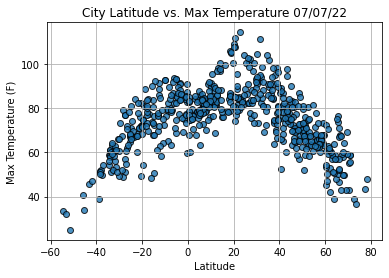

In [15]:
# Import the time module
import time

# Build the scatter plot for latitude vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()

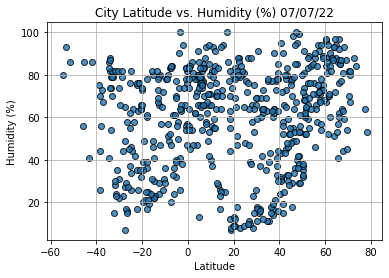

In [16]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%) " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# show plot
plt.show()

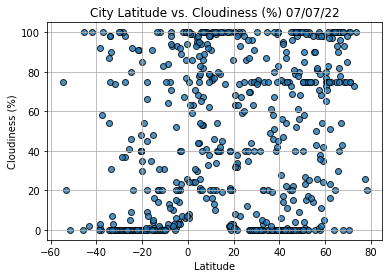

In [17]:
# Build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# show plot
plt.show()

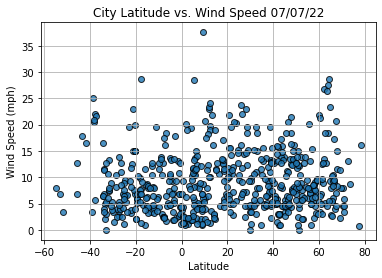

In [32]:
# Build the scatter plot for latitude vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# show plot
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create a new DataFrame with the current one and use the loc method on the current Dataframe to access a group of rows and columns
index13 = city_data_df.loc[13]
index13

City                     Eirunepe
Country                        BR
Date          2022-07-07 15:40:40
Lat                       -6.6603
Lng                      -69.8736
Max Temp                    87.17
Humidity                       61
Cloudiness                     10
Wind Speed                   1.63
Name: 13, dtype: object

In [21]:
# Filter the city_data DataFrame for the Northern Hemisphere latitudes >= 0
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
578     True
579     True
580     True
581     True
582     True
Name: Lat, Length: 583, dtype: bool

In [22]:
# Create a DataFrame of the NH lats
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pangnirtung,CA,2022-07-07 15:33:44,66.1451,-65.7125,46.40,76,40,10.36
1,Ilinskiy,RU,2022-07-07 15:40:38,55.6190,38.1182,67.71,88,75,20.13
4,Ruwi,OM,2022-07-07 15:40:38,23.5996,58.5507,83.89,80,100,5.41
6,Lehre,DE,2022-07-07 15:40:39,52.3333,10.6667,67.24,83,75,13.80
8,Sao Filipe,CV,2022-07-07 15:32:52,14.8961,-24.4956,76.23,73,19,11.54


In [23]:
# Create a Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

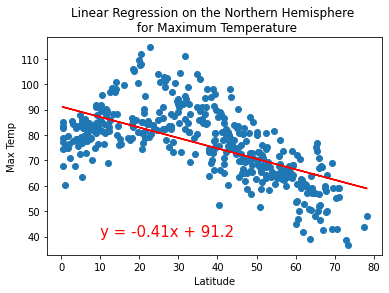

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

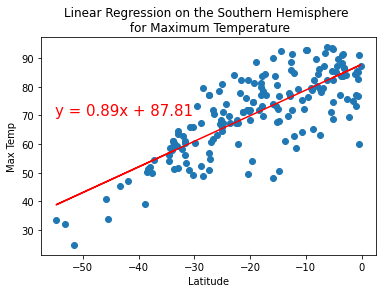

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,70))

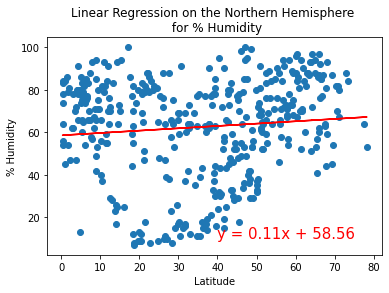

In [26]:
# Linear regression on the Northern Hemisphere humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

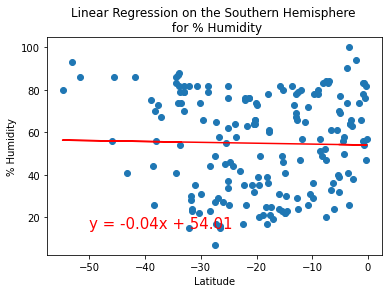

In [27]:
# Linear regression on the Southern Hemisphere humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

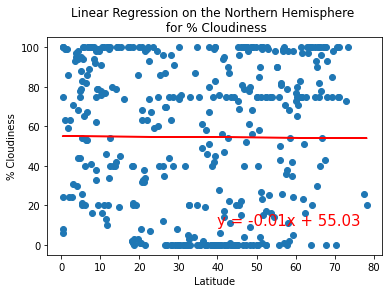

In [28]:
# Linear regression on the Northern Hemisphere cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

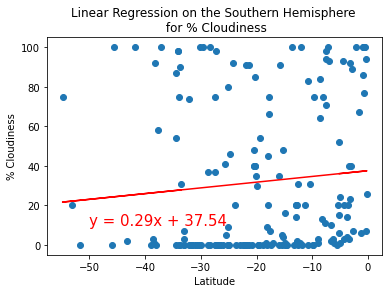

In [29]:
# Linear regression on the Southern Hemisphere cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,10))

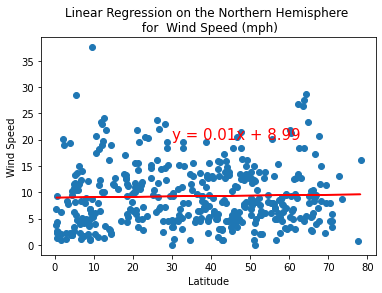

In [30]:
# Linear regression on the Northern Hemisphere wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for  Wind Speed (mph)', 'Wind Speed',(30,20))

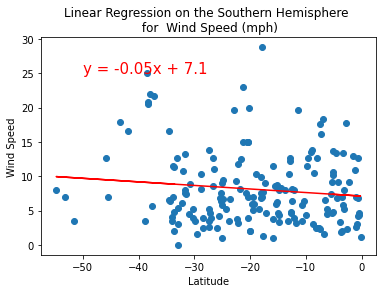

In [31]:
# Linear regression on the Southern Hemisphere wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for  Wind Speed (mph)', 'Wind Speed',(-50,25))